#### โครงข่ายประสาทเทียมและการเรียนรู้เชิงลึก (Artificial Neural Networks and Deep Learning)
**ดร.วโรดม ตู้จินดา**
<br>ภาควิชาวิศวกรรมเครื่องกล มหาวิทยาลัยเกษตรศาสตร์

***
## บทที่ 3 การปรับปรุงโครงข่ายประสาทเทียม

จากที่ได้เกริ่นนำในบทที่ผ่านมาว่าการออกแบบและใช้งานโครงข่ายประสาทเทียมในทางปฏิบัติจะเป็นกรรมวิธีที่วนรอบ 
ในช่วงเริ่มต้นของโครงการคงเป็นไปไม่ได้ที่จะกำหนดค่าของไฮเปอร์พารามิเตอร์ต่างๆ ได้อย่างเหมาะสมในทันที เช่นจำนวนชั้นแฝง 
จำนวนเซลล์ในชั้นเหล่านั้น อัตราการเรียนรู้ ฟังก์ชันกระตุ้น ฯลฯ แต่จะต้องผ่านการทดสอบและปรับแต่งแก้ไขจนกว่าจะได้ความแม่นยำตามเป้าหมาย 
ในยุคสมัยนี้ที่ทุกสิ่งทุกอย่างต้องดำเนินการแข่งกับเวลา การศึกษาเกี่ยวกับการปรับแต่งไฮเปอร์พารามิเตอร์จึงเป็นสิ่งที่จำเป็น
เพื่อว่าเราจะทดสอบและแก้ไขเป็นจำนวนรอบน้อยที่สุด ดังนั้นเนื้อหาในบทนี้จะเน้นการปรับแต่งโมเดล DNN จากบทที่ 2 เพื่อให้มีประสิทธิภาพตามต้องการ 
โดยข้อกำหนดของแต่ละโจทย์ปัญหาอาจแตกต่างกันไปตามสมรรถนะของตัวประมวลผลและทรัพยากร จำนวนข้อมูลการฝึก เป็นต้น

ก่อนที่จะกล่าวถึงการปรับปรุงโมเดล DNN ปัจจัยสำคัญอันดับแรกที่ต้องพิจารณาคือการบริหารข้อมูลอย่างไรให้เหมาะสม

### 3.1 การจัดการข้อมูล

เราได้เข้าใจแล้วว่าข้อมูลมีความสำคัญอย่างยิ่งยวดต่อการเรียนรู้เชิงลึก เพราะโมเดล DNN มิใช่ขั้นตอนวิธีที่เขียนเป็นคำสั่งเงื่อนไขตายตัว 
แต่จะถูกขับโดยข้อมูล คือการปรับค่าพารามิเตอร์ของโมเดลในขั้นตอนของการฝึกจนกระทั่งได้ความแม่นยำตามเกณฑ์ที่กำหนด ดังนั้นกล่าวได้ว่า
ประสิทธิภาพของโมเดลขึ้นกับคุณภาพและปริมาณของข้อมูลอย่างมาก 

แนวทางการจัดการข้อมูลสำหรับการเรียนรู้เชิงลึกโดยทั่วไปจะแบ่งข้อมูลเป็น 3 ชุดหลักคือ
1. ชุดข้อมูลสำหรับการฝึก (training set) ใช้ในขั้นตอนการฝึกตามแผนภาพการคำนวณข้างหน้าและย้อนกลับที่ได้อธิบายในบทที่ 2 
โดยมีการวนรอบตามที่กำหนดเพื่อลดค่าสูญเสียและเพิ่มความแม่นยำ 
2. ชุดข้อมูลสำหรับการพัฒนา (development set) คือข้อมูลส่วนหนึ่งที่แยกไว้สำหรับตรวจสอบข้าม (cross validation) เพื่อปรับปรุงโมเดล 
หรือตรวจสอบว่าโมเดลใดให้ผลดีสุดกรณีมีหลายโมเดล
3. ขุดข้อมูลสำหรับทดสอบ (test set) ใช้ในการทดสอบขั้นสุดท้ายเมื่อได้โมเดลที่พอใจแล้ว

ในระบบขนาดเล็กที่ไม่ซับซ้อนมาก เพื่อความง่ายอาจรวมชุดข้อมูล 2,3 เข้าด้วยกันและเรียกเป็นชุดข้อมูลสำหรับทดสอบ 

การแบ่งข้อมูลทั้งหมดออกเป็นชุด 1,2,3 ขึ้นอยู่กับผู้ใช้ นิยมตั้งเป็นอัตราส่วนเช่น 60%, 20%, 20% เช่นมีข้อมูลจำนวน 100,000 ตัวอย่าง 
แบ่งเป็นใช้สำหรับฝึก 60,000 ตัวอย่าง สำหรับพัฒนาและทดสอบอย่างละ 20,000 ตัวอย่าง เป็นต้น ในกรณีที่มีข้อมูลจำนวนมาก เช่นล้านตัวอย่าง 
อาจลดอัตราส่วนชุดข้อมูลพัฒนาและทดสอบน้อยลงเช่นเหลือเพียงอย่างละ 1% 

ข้อควรระวังเกี่ยวกับการใช้ชุดข้อมูลฝึกและทดสอบคือ ข้อมูลต้องมาจากการแจกแจง (distribution) ที่เหมือนกัน 
ตัวอย่างของการใช้ชุดข้อมูลที่ไม่สอดคล้องกันคือ สมมุติว่าต้องการสร้างโมเดลจำแนกสุนัขและแมว เราค้นหาข้อมูลภาพจากอินเทอร์เน็ตเพื่อฝึกโมเดล 
ซึ่งเป็นภาพสัตว์เลี้ยงที่ส่วนใหญ่ถ่ายโดยช่างภาพมืออาชีพ มีความชัดเจนและรายละเอียดสูง
แต่เมื่อนำไปทดสอบหรือใช้งานจากภาพผู้ใช้ที่อาจไม่มีคุณภาพดีเท่าเทียม เช่นเบลอ แสงน้อย จัดองค์ประกอบภาพไม่ดี ผลที่ได้ก็คงไม่เป็นตามที่ต้องการ 

#### 3.1.1 ค่าเอนเอียงและความแปรปรวน

รูปที่ 3.1 แสดงตัวอย่างการจำแนกข้อมูลในระนาบ 2 มิติ โดยข้อมูลสองประเภทแทนด้วยวงกลมและสี่เหลี่ยม ในรูป (a) ด้านซ้ายสุดเป็นการจำแนกโดยเส้นตรง
จะเห็นว่าไม่สามารถแบ่งกลุ่มข้อมูลได้ดีเท่าที่ควร คือมีการฟิตตำ่ไป (underfit) เรียกกรณีนี้ว่า มีค่าเอนเอียงสูง (high bias) 

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=17vghyzLUAh4xuVnZMRvSxEEmOY0nn8r6" width=750 />
</p>
<div align="center">รูปที่ 3.1 การจำแนกทวิภาคในระนาบ 2 มิติ</div>


**หมายเหตุ :** คำว่าไบแอสหรือค่าเอนเอียงในบริบทนี้ไม่มีความเกี่ยวข้องกับค่าเอนเอียง b ที่เป็นพารามิเตอร์ของโมเดล

หากพิจารณารูป (c) ด้านขวาสุดซึ่งเป็นการฟิตเกิน (overfit) ถึงแม้ว่าจะสามารถจำแนกข้อมูลฝึกได้อย่างสมบูรณ์แต่ก็มีความซับซ้อนเกินความจำเป็น
ไม่สามารถคาดหวังว่าจะทำงานได้ดีกับข้อมูลทดสอบหรือข้อมูลใหม่ที่เข้ามา เรียกกรณีนี้ว่า มีความแปรปรวนสูง (high variance) 
ตัวจำแนกที่อยู่ระหว่างกลางคือรูป (c) ที่เป็นตัวเลือกที่เหมาะสมสำหรับปัญหานี้ กรณีเหล่านี้จะเกิดขึ้นเช่นเดียวกันในระบบหลายมิติ 
การยกตัวอย่างในระนาบ 2 มิติทำให้เห็นภาพได้ชัดเจนขึ้นเท่านั้น 

สาระสำคัญของเนื้อหาในหัวข้อย่อยนี้คือ 
ต้องการหลีกเลี่ยงทั้งกรณีค่าเอนเอียงสูงและความแปรปรวนสูง ในสมัยก่อนจะมีประเด็นที่นิยมกล่าวถึงกันเรียกว่า 
การประนีประนอมระหว่างค่าเอนเอียงและความแปรปรวน (bias-variance tradeoff) 
เนื่องจากการปรับค่าเอนเอียงลดลงมีผลกระทบทำให้ความแปรปรวนสูงขึ้น หรือกลับกัน แต่ในยุคของการเรียนรู้เชิงลึกจะถูกกล่าวถึงน้อยลง 
ทั้งนี้เนื่องจากการใช้โมเดลที่มีขนาดใหญ่สามารถช่วยลดค่าเอนเอียงโดยไม่กระทบความแปรปรวน 
ในทำนองเดียวกันการเพิ่มขนาดของข้อมูลช่วยลดความแปรปรวนได้โดยไม่กระทบกับค่าเอนเอียง


##### ตัวอย่าง 3.1

รูปที่ 3.2 แสดงตัวอย่างการจำแนกทวิภาคภาพสุนัขและแมว โดยโมเดลจะให้เอาต์พุตเท่ากับ 0 สำหรับภาพสุนัขและ 1 สำหรับภาพแมว 
เราจะเปรียบเทียบค่าผิดพลาดของกรณี A,B,C,D กํบกรณีตรวจสอบโดยมนุษย์ โดยสมมุติว่ามนุษย์สามารถจำแนกภาพได้โดยมีความผิดพลาดเป็นศูนย์ 

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1CkNZsqNEPCHOYyRsjuCODrLbaWgiNipw" width=500 />
</p>
<div align="center">รูปที่ 3.2 ปัญหาการจำแนกภาพสุนัขและแมว</div>

* A. ได้ค่าผิดพลาดจากชุดข้อมูลฝึกเท่ากับ 0.5% และค่าผิดพลาดจากชุดข้อมูลพัฒนาเท่ากับ 1% จัดได้ว่าเป็นโมเดลที่ดี 
คือได้ทั้งค่าเอนเอียงและความแปรปรวนต่ำ 
* B. ได้ค่าผิดพลาดจากชุดข้อมูลฝึกเท่ากับ 1% และค่าผิดพลาดจากชุดข้อมูลพัฒนาเท่ากับ 12% คือกรณีความแปรปรวนสูง 
จะเห็นว่าโมเดลมีความแม่นยำสูงกับข้อมูลฝึก แต่ทำงานได้ไม่ดีกับข้อมูลพัฒนาเนื่องจากการฟิตเกิน 
* C. ได้ค่าผิดพลาดจากชุดข้อมูลฝึกเท่ากับ 20% และค่าผิดพลาดจากชุดข้อมูลพัฒนาเท่ากับ 21% คือกรณีค่าเอนเอียงสูง 
โมเดลทำงานได้ไม่ดีตั้งแต่กับชุดข้อมูลการฝึก และก็ได้ผลใกล้เคียงกันกับชุดข้อมูลพัฒนา คือมีการฟิตต่ำไป
* D. ได้ค่าผิดพลาดจากชุดข้อมูลฝึกเท่ากับ 20% และค่าผิดพลาดจากชุดข้อมูลพัฒนาเท่ากับ 30% คือกรณีทั้งค่าเอนเอียงและความแปรปรวนสูง 
เป็นโมเดลที่ด้อยที่สุดสำหรับทั้ง 4 กรณีที่ยกตัวอย่างมา

#### 3.1.2 วิธีพื้นฐานในการลดค่าเอนเอียงและความแปรปรวน

เมื่อตรวจสอบสมรรถนะของโมเดลที่มีต่อข้อมูลชุดฝึกและพัฒนาดังเช่นในตัวอย่าง 3.1 เราสามารถตัดสินเบื้องต้นเกี่ยวกับค่าเอนเอียงและความแปรปรวนของโมเดล 
และใช้วิธีการพื้นฐานในการแก้ปัญหาดังนี้

หากพบว่าโมเดลมีค่าเอนเอียงสูง (ต้องการปรับปรุงสมรรถนะต่อข้อมูลฝึก)
* เพิ่มขนาดของ DNN
* เพิ่มจำนวนรอบการฝึก หรือทดลองเปลี่ยนตัวหาค่าเหมาะที่สุด
* อาจทดลองเปลี่ยนสถาปัตยกรรมของโครงข่ายประสาทเทียม 

หากพบว่าโมเดลมีความแปรปรวนสูง (ต้องการปรับปรุงสมรรถนะต่อข้อมูลพัฒนา)
* เพิ่มจำนวนข้อมูล
* ลดการฟิตเกินโดยวิธีเช่นเรกูลาร์ไรเซชันหรือดรอปเอาต์ (จะได้กล่าวถึงต่อไปในบทนี้)
* อาจทดลองเปลี่ยนสถาปัตยกรรมของโครงข่ายประสาทเทียม 

เมื่อปรับเปลี่ยนโมเดลแล้วต้องกลับไปตรวจสอบใหม่จนกว่าจะได้ค่าเอนเอียงและความแปรปรวนอยู่ในเกณฑ์ที่ยอมรับได้

### 3.2 การปรับปรุงโมเดลความแปรปรวนสูง

จากคำอธิบายก่อนหน้านี้ กรณีที่ไม่ต้องการเปลี่ยนสถาปัตยกรรมของโครงข่ายและไม่สามารถเพิ่มข้อมูล 
การปรับปรุงโมเดลที่มีความแปรปรวนสูงคือลดผลจากการฟิตเกิน ซึ่งมีวิธีการที่นิยมอยู่ 2 
วิธีคือการทำเรกูลาร์ไรเซชันและการดรอปเอาต์เซลล์ของโครงข่าย

#### 3.2.1 การเรกูลาร์ไรเซชันโครงข่ายประสาทเทียม

วิธีการเรกูลาร์ไรเซชัน (regularization) เป็นทางแก้หนึ่งสำหรับปัญหาฟิตเกินที่ทำให้เกิดความแปรปรวนสูง 
แนวทางคือการลดค่าน้ำหนักในเซลล์ของโครงข่ายประสาทเทียม เมื่อผลตอบสนองของบางเซลล์ถูกลดลงจะช่วยแก้การฟิตเกินลงได้
(หลักการเช่นเดียวกันถูกใช้ในวิธีการดรอปเอาต์โดยตัดบางเซลล์ในโครงข่ายออก) หากเปรียบเทียบการจำแนกทวิภาคในรูปที่ 3.1 
เรกูลาร์ไรเซชันจะช่วยเปลี่ยนเอาต์พุตที่มีความแปรปรวนสูง (c) เข้าสู่เอาต์พุตทางด้านซ้าย (a)
โดยหากปรับพารามิเตอร์อย่างเหมาะสมคาดหวังที่จะได้การจำแนกประมาณในภาพกลาง (b) หรือหากมองในอีกแง่มุมหนึ่ง 
การลดค่าน้ำหนักทำให้ฟังก์ชันกระตุ้นเช่น $\sigma()$ หรือ $tanh()$ ทำงานในช่วงที่เป็นเชิงเส้นมากขึ้น

การลดค่าน้ำหนักทำได้โดยเพิ่มพจน์ลงโทษค่าน้ำหนักในฟังก์ชันมูลค่า ยกตัวอย่างกรณีโมเดลการถดถอยลอจิสติก ฟังก์ชันมููลค่าใหม่จะเขียนได้เป็นดังนี้

$$
J(w,b) = \frac{1}{m}\sum_{i=1}^m\mathcal{L}(\hat{y}^{(i)},y^{(i)})+\frac{\lambda}{2m}\lVert w\rVert_2^2 \tag{3.1}
$$

โดยค่า $\lambda$ เรียกว่าพารามิเตอร์การเรกูลาร์ไรเซชัน เป็นไฮเปอร์พารามิเตอร์ซึ่งต้องถูกเลือกโดยผู้พัฒนา 
เวกเตอร์ $w \in \mathbf{R}^{n_x}$ คือเวกเตอร์ของค่าน้ำหนัก 
และ $\lVert w\rVert_2^2 = \sum_{j=1}^{n_x}w_j^2 = w^Tw$ 
คือกำลังสองของค่านอร์มสองของ $w$ ดังนั้น (3.1) ถูกเรียกแบบเต็มว่าการเรกูลาร์ไรเซชันแบบ L2

ผู้อ่านอาจสงสัยว่าทำไมเราเพิ่มแต่พจน์ที่ขึ้นกับ $w$ ในฟังก์ชันมูลค่าโดยไม่สนใจค่าเอนเอียง $b$ เหตุผลคือค่าเอนเอียงเป็นเพียงตัวเลขสเกลาร์ตัวเดียว 
ค่าน้ำหนักเป็นเวกเตอร์ความยาว $n_x$ จึงมีผลกระทบต่อโครงข่ายโดยรวมมากกว่า เราสามารถใส่พจน์ลงโทษค่าเอนเอียงลงใน $J(w,b)$ 
ได้หากต้องการ แต่ก็เพียงทำให้สมการซับซ้อนขึ้นโดยไม่มีผลเด่นชัด

การเรกูลาร์ไรเซชันมีรูปแบบอื่น เช่นแบบ L1 ที่พจน์สุดท้ายด้านขวาของ (3.1) เขียนอยู่ในรูป
$$
\frac{\lambda}{2m}\lVert w \rVert_1 = \frac{\lambda}{2m}\sum_{i=1}{n_x}|w| \tag{3.2}
$$

ผลจาการใช้เรกูลาร์ไรเซชันแบบ L1 คือทำให้เวกเตอร์ $w$ เป็นแบบมากเลขศูนย์ (sparse) เป็นเสมือนการบีบอัดโมเดล 
ในทางปฏิบัติจะพบการเรกูลาร์ไรเซชันแบบ L2 มากกว่า

สำหรับโมเดล DNN เมื่อใช้เรกูลาร์ไรเซชันแบบ L2 ฟังก์ชันมูลค่าจะเขียนได้เป็นดังนี้
$$
J(W^{[1]},b^{[1]}, \ldots,W^{[L]},b^{[L]}) = \frac{1}{m}\sum_{i=1}^{m}\mathcal{L}(\hat{y}^{(i)},y^{(i)})+\frac{\lambda}{2m}\sum_{l=1}^{L}\lVert W^{[l]}\rVert_F^2 \tag{3.3}
$$
จากทฤษฎีพีชคณิตเชิงเส้น นอร์มของเมทริกซ์ $W$ จะไม่เรียกว่านอร์ม L2 แต่มีชื่อเรียกว่า นอร์มโฟรเบนิอุส (Frobenius norm) ใช้สัญลักษณ์ $\lVert . \rVert_F$ นิยามได้เป็น
$$
\lVert W^{[l]}\rVert_F^2 = \sum_{i=1}^{n^{[l]}} \sum_{j=1}^{n^{[l-1]}} \left(w_{i,j}^{[l]}\right)^2 \tag{3.4}
$$

จากขั้นตอนในแผนภาพการคำนวณย้อนหลังเมื่อมีการใช้เรกูลาร์ไรเซชันอธิบายได้ดังนี้ พิจารณาชั้น $l$ กรณีไม่มีเรกูลาร์ไรเซชัน 
ขั้นตอนวิธีการแพร่กระจายย้อนหลังจะให้ผลลัพธ์ $\frac{\partial J}{\partial W^{[l]}}$ ซึ่งเราเขียนแทนโดยย่อว่า $dW^{[l]}$ 
เรียกพจน์นี้ว่า $[BP]$ ดังนั้นเมื่อเพิ่มพจน์เรกูลาร์ไรเซชัน จะได้ว่า
$$
dW^{[l]} = [BP] + \frac{\lambda}{m}W^{[l]} \tag{3.5}
$$
และสมการอัพเดตเมทริกซ์ค่าน้ำหนัก
$$
W^{[l]} := W^{[l]} -\alpha (dW^{[l]}) = W^{[l]} -\alpha ([BP] + \frac{\lambda}{m}W^{[l]})
$$
เมื่อจัดรูปแล้วจะได้เป็น
$$
W^{[l]} := W^{[l]} -\frac{\alpha\lambda}{m} W^{[l]} -\lambda [BP] \tag{3.6}
$$

จากสมการ (3.6) ทำให้เรกูลาร์ไรเซชันนี้มีชื่อเรียกอีกอย่างหนึ่งว่า "การลดระดับค่าน้ำหนัก" (weight decay) เนื่องจากเมทริกซ์น้ำหนักจะถูกปรับค่าด้วยตัวประกอบ 
$(1-\frac{\alpha\lambda}{m})$ ที่มีค่าน้อยกว่าหนึ่งทุกครั้งของการอัพเดต 

##### ตัวอย่าง 3.1

ในตัวอย่างนี้จะต้องการใช้ไลบรารีสนับสนุน mlxtend (https://github.com/rasbt/mlxtend) 
สำหรับพล็อตเส้นแสดงเขตการจำแนก สามารถติดตั้งไลบรารีโดยรันเซลล์ด้านล่าง

In [2]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 1.4 MB/s eta 0:00:01


นำเข้าไลบรารีทั้งหมดที่ใช้งาน

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from mlxtend.plotting import plot_decision_regions

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

ตัวอย่างนี้ใช้ข้อมูลในแบบฝึกหัดสัปดาห์แรกของคอร์สออนไลน์ 
"Improving Deep Neural Networks: Hyperparameter tuning, Regularization and Optimization" 
โดย Prof.Andrew NG สำหรับผู้สนใจสามารถลงทะเบียนเรียนได้ที่ Coursera 
ในแบบฝึกหัดเพิ่มความน่าสนใจของโจทย์เป็นตำแหน่งผู้เล่น 2 
ทีมที่มีโอกาสโหม่งลูกฟุตบอลเมื่อผู้รักษาประตูเตะลูกมาในสนาม แต่โดยหลักการแล้วคือการจำแนกทวิภาคของข้อมูล 
2 กลุ่มในระนาบสองมิติ ในการสร้างและฝึกโมเดลจะใช้โค้ดไพธอนเช่นเดียวกับในบทที่ 2 
ผู้เรียนต้องเพิ่มส่วนเรกูลาร์ไรเซชัน (3.3) ลงในโค้ด ซึ่งสามารถทำให้เข้าใจได้อย่างถ่องแท้ 
แม้ว่าจะต้องอาศัยประสบการณ์การพัฒนาโปรแกรมโดยภาษาไพธอนอยู่พอสมควร ดังนั้นสำหรับในตัวอย่างนี้เราจะใช้ไลบรารี TF 
สร้างโมเดล DNN ซึ่งมีตัวเลือกในการทำเรกูลาร์ไรเซชันให้กับแต่ละชั้นของโมเดล

ข้อมูลถูกเก็บในไฟล์ "data.mat" ที่เราจะใส่ในไดเรคทอรี "datasets/" 
เขียนฟังก์ชัน ex31_load_data() เพื่อโหลดข้อมูลฝึกและทดสอบเข้าสู่แอเรย์พร้อมกับพล็อตในระนาบ 2 
มิติดังแสดงในรูปที่ 3.3

In [5]:
def ex31_load_dataset():
    data = scipy.io.loadmat('datasets/data.mat')
    train_X = data['X']
    train_Y = data['y']
    test_X = data['Xval']
    test_Y = data['yval']
    for i in range(len(train_Y)):
        if train_Y[i,0] == 1:
            plt.scatter(train_X[i,0],train_X[i,1],c='orange', marker='^',s=40)
        else:
            plt.scatter(train_X[i,0],train_X[i,1],c='blue', marker='s',s=40)
    return train_X, train_Y, test_X, test_Y

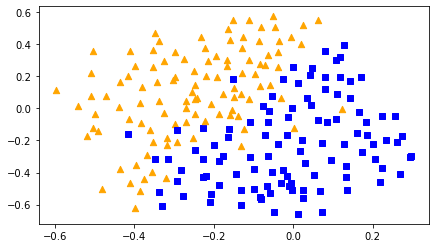

In [6]:
train_X, train_Y, test_X, test_Y = ex31_load_dataset()

รูปที่ 3.3 ข้อมูลสองมิติที่ต้องการจำแนกในตัวอย่าง 3.1

แอเรย์ข้อมูลที่คืนจากฟังก์ชัน ex31_load_dataset() เป็นชุดฝึก 211 จุดและชุดทดสอบ 200 จุด จากการประมาณโดยสายตา 
ข้อมูลในระนาบ 2 มิติในรูปที่ 3.3 สามารถถูกจำแนกได้โดยเส้นตรงในแนวทแยงมุม 
โดยพิจารณาจุดที่หลุดออกไปไกลจากกลุ่มเป็นเสมือนการรบกวน แต่โมเดลที่มีความแปรปรวนสูงจะมีแนวโน้มฟิตเกิน 
คือให้ความสำคัญกับจุดที่เป็นการรบกวนมากเกินไป 

เริ่มต้นโดยสร้างโมเดล DNN 3 ชั้นที่มีจำนวนเซลล์ 20, 30, 1 เป็นเส้นฐาน (baseline) โดยใช้ไลบรารี TF ดังนี้

In [7]:
model = Sequential([
    Flatten(input_shape=[2]),
    Dense(20, activation='relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

คอมไพล์โมเดลตามรูปแบบการจำแนกทวิภาคที่ได้อธิบายในบทที่ 2 ผู้อ่านสามารถปรับอัตราการเรียนรู้ตามต้องการ

In [8]:
model.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy', metrics=['accuracy'])

ฝึกโมเดลจำนวน 10000 รอบ เก็บข้อมูลฝึกในดิกชันนารี history 

In [9]:
history = model.fit(train_X, train_Y, epochs=10000, validation_data=(test_X,test_Y),verbose=0)

พล็อตความแม่นยำจากชุดข้อมูลฝึกและทดสอบดังแสดงในรูปที่ 3.4 

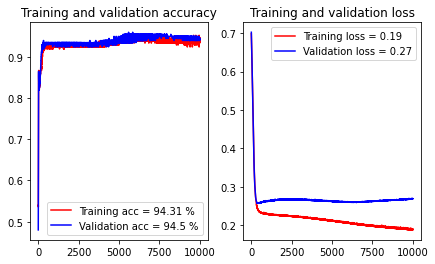

In [11]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc)) # Get number of epochs

acc_txt = str(round(acc[len(acc)-1]*100,2))
val_acc_txt = str(round(val_acc[len(val_acc)-1]*100,2))

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(epochs, acc,'r',epochs,val_acc,'b')
ax1.set_title('Training and validation accuracy')
ax1.legend(["Training acc = "+acc_txt+" %","Validation acc = "+val_acc_txt+" %"])

loss_txt = str(round(loss[len(loss)-1],2))
val_loss_txt = str(round(val_loss[len(val_loss)-1],2))

ax2.plot(epochs, loss, 'r',epochs, val_loss, 'b')
ax2.legend(["Training loss = "+loss_txt,"Validation loss = "+val_loss_txt])
ax2.set_title('Training and validation loss');


รูปที่ 3.4 ความแม่นยำและค่าสูญเสียจากโมเดลเส้นฐาน

สามารถสังเกตผลจากการฟิตเกินได้ในพล็อตของค่าสูญเสียทางด้านขวาของรูปที่ 3.4 
โดยขณะที่ค่าสูญเสียจากข้อมูลฝึกลดลงต่อเนื่องตามจำนวนรอบการฝึก 
ค่าสูญเสียจากข้อมูลทดสอบกลับมีแนวโน้มเพิ่มขึ้น
เมื่อพล็อตเส้นแบ่งเขตเพื่อตรวจสอบสมรรถนะการจำแนกข้อมูลจากโมเดลเส้นฐานจะได้ดังในรูปที่ 3.5


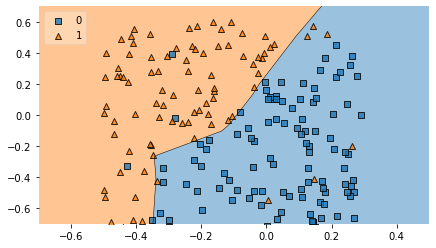

In [12]:
plot_decision_regions(test_X, np.squeeze(test_Y), clf=model, legend=2)
plt.xlim([-0.7,0.5])
plt.ylim([-0.7,0.7])
plt.show()

รูปที่ 3.5 เส้นแบ่งเขตการจำแนกข้อมูลจากโมเดลเส้นฐาน

การทำเรกูลาร์ไรเซชันกับชั้นแฝงของโมเดลโดยไลบรารี TF มีตัวเลือกมากกว่าเนื้อหาที่อธิบาย 
เช่นนอกจากจะเลือกชนิด L1, L2 แล้วยังสามารถทำกับค่าน้ำหนัก ค่าเบี่ยงเบน หรือฟังก์ชันกระตุ้นก็ได้ 
ในตัวอย่างนี้เราจะเลือกทำกับค่าน้ำหนักโดยตัวเลือก kernel_regularizer สร้างโมเดล model_L2 ดังนี้ 
(ปรับค่าพารามิเตอร์ $\lambda$ ตามต้องการ)

In [13]:
from tensorflow.keras.regularizers import L2

In [23]:
model_L2 = Sequential([
    Flatten(input_shape=[2]),
    Dense(20, kernel_regularizer=L2(0.01), activation='relu'),
    Dense(30, kernel_regularizer=L2(0.01), activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

คอมไพล์และฝึกจำนวน 10,000 รอบเท่ากับโมเดลเส้นฐาน

In [24]:
model_L2.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
history_L2 = model_L2.fit(train_X, train_Y, epochs=10000, validation_data=(test_X,test_Y),verbose=0)

พล็อตความแม่นยำจากชุดข้อมูลฝึกและทดสอบดังแสดงในรูปที่ 3.6

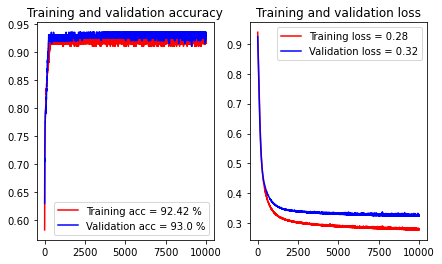

In [26]:
acc_L2=history_L2.history['accuracy']
val_acc_L2=history_L2.history['val_accuracy']
loss_L2=history_L2.history['loss']
val_loss_L2=history_L2.history['val_loss']
epochs_L2=range(len(acc_L2)) # Get number of epochs

acc_L2_txt = str(round(acc_L2[len(acc_L2)-1]*100,2))
val_acc_L2_txt = str(round(val_acc_L2[len(val_acc_L2)-1]*100,2))

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(epochs_L2, acc_L2,'r',epochs_L2,val_acc_L2,'b')
ax1.set_title('Training and validation accuracy')
ax1.legend(["Training acc = "+acc_L2_txt+" %","Validation acc = "+val_acc_L2_txt+" %"])

loss_L2_txt = str(round(loss_L2[len(loss_L2)-1],2))
val_loss_L2_txt = str(round(val_loss_L2[len(val_loss_L2)-1],2))

ax2.plot(epochs_L2, loss_L2, 'r',epochs_L2, val_loss_L2, 'b')
ax2.legend(["Training loss = "+loss_L2_txt,"Validation loss = "+val_loss_L2_txt])
ax2.set_title('Training and validation loss');

รูปที่ 3.6 ความแม่นยำและค่าสูญเสียจากโมเดลเรกูลาร์ไรเซชัน L2



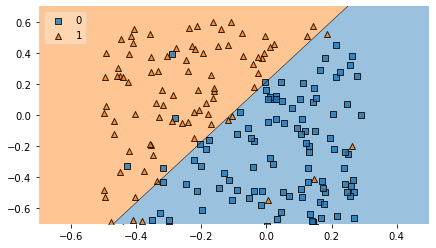

In [27]:
plot_decision_regions(test_X, np.squeeze(test_Y), clf=model_L2, legend=2)
plt.xlim([-0.7,0.5])
plt.ylim([-0.7,0.7])
plt.show()

รูปที่ 3.7 เส้นแบ่งเขตการจำแนกข้อมูลจากโมเดลเรกูลาร์ไรเซชัน L2

ค่าของความแม่นยำและค่าสูญเสียอาจแตกต่างกันไปเล็กน้อยในแต่ละครั้งของการรัน แต่สิ่งที่สังเกตได้คือเส้นขอบเขตในรูปที่ 3.7 
จากโมเดลที่มีการเรกูลาร์ไรเซชันจะมีลักษณะเข้าใกล้เส้นตรงมากกว่า แสดงถึงโมเดลมีการฟิตเกินน้อยกว่า 

#### 3.2.2 วิธีการดรอปเอาต์

การลดการฟิตเกินอีกวิธีหนึ่งที่ใช้ได้ผลดีคือ ดรอปเอาต์ (dropout) แนวคิดคือต้องการกระจายค่านำ้หนักโดยไม่ขึ้นกับลักษณะเด่น
ของอินพุตตัวอย่างใดมากเกินไป อธิบายได้โดยดูรูปที่ 3.8 ประกอบ สมมุติว่าโครงข่ายในรูปด้านบนซ้ายคือโมเดลที่ต้องการฝึก
ในแต่ละตัวอย่างข้อมูลการฝึกจะตัดเซลล์ในแต่ละชั้นออกแบบสุ่มตามสัดส่วนที่กำหนด เช่น 30%, 50% พร้อมขจัดการเชื่อมต่อที่เป็นอินพุตและเอาต์พุตของเซลล์นั้น 
ตัวอย่างเซลล์และเส้นทางที่ถูกตัดออกแสดงโดยเส้นประ ผลคือจะได้โครงข่ายขนาดเล็กลง สังเกตว่าตำแหน่งที่ตัดเซลล์ออกจะไม่คงที่ 
เพราะเมื่อประมวลผลตัวอย่างข้อมูลใหม่ก็จะเลือกเซลล์ที่ถูกตัดออกตำแหน่งใหม่แบบสุ่ม 

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1EBQHzY354lMR25n3Ptzf22IjxMzLzQg7" width=750 />
</p>
<div align="center">รูปที่ 3.8 หลักการของวิธีการดรอปเอาต์</div>

ในการอิมพลิเมนต์ดรอปเอาต์ วิธีหนึ่งที่นิยมใช้คือดรอปเอาต์ผกผัน (inverted dropout) ในกรณีที่สร้างโมเดลจากโค้ดไพธอนดังเช่นในบทที่ 
2 สมมุติว่าต้องการตัดเซลล์ในชั้น $l = 3$ สร้างเมทริกซ์ d3 โดยคำสั่ง
```python
d3 = np.random.rand(a3.shape[0],a3.shape[1]) < keep_prob
```
สังเกตว่า d3 มีขนาดเท่ากับ a3 และมีค่าขึ้นกับเงื่อนไขเปรียบเทียบค่าสุ่มที่กำเนิดจาก np.random.rand() กับตัวแปร 
keep_prob ซึ่งคือค่าสัดส่วนของเซลล์ที่ยังคงอยู่ตามที่เรากำหนด ตัวอย่างเช่นหากต้องการรักษาเซลล์ไว้ 80% 
(หรือตัดเซลล์ทิ้งไป 20%) ตั้งค่า keep_prob = 0.8 จากนั้นคำนวณเอาต์พุตจากฟังก์ชันกระตุ้นในชั้นที่ 3 ดังนี้
```python
a3 = np.multiply(a3,d3)
```
เป็นการคูณค่าเอาต์พุต a3 เดิมกับ d3 แบบสมาชิกต่อสมาชิก (คำสั่งทำงานได้ถึงแม้ว่าค่าใน d3 เป็นตรรกะ true/false)
สุดท้ายคือการปรับมาตราส่วนเพื่อชดเชยเซลล์ที่ถูกตัดทิ้งไป เพื่อทำให้ค่าคาดหมายของ a3 คงเดิม
```python
a3 /= keep_prob
```
จุดสำคัญหนึ่งของวิธีการดรอปเอาต์คือ เราจะไม่ใช้ดรอปเอาต์ในขั้นตอนการพยากรณ์ข้อมูลทดสอบ 
เพราะจะเป็นเสมือนสร้างการรบกวนในการพยากรณ์ซึ่งไม่เป็นผลดี 

##### ตัวอย่าง 3.2

ในการสร้างโมเดลโดยไลบรารี TF สามารถกำหนดชั้นดรอปเอาต์แทรกในโครงข่ายได้โดยง่าย โดยใส่อาร์กิวเมนต์ 
rate ค่าในช่วง 0-1 เป็นอัตราส่วนของเซลล์ที่ต้องการตัดทิ้ง (ตรงกันข้ามกับตัวแปร keep_prob ที่อธิบายด้านบน) 
ทดลองใช้ดรอปเอาต์เพื่อเปรียบเทียบกับโมเดลเส้นฐานและวิธีเรกูลาร์ไรเซชันในตัวอย่าง 3.1 รูปที่ 3.9 และ 3.10 
แสดงผลที่ได้จากวิธีดรอปเอาต์ซึ่งจะเห็นว่าสามารถลดผลจากการฟิตเกินได้

In [28]:
from tensorflow.keras.layers import Dropout

In [29]:
model_DO = Sequential([
    Flatten(input_shape=[2]),
    Dense(20, activation='relu'),
    Dropout(0.5),
    Dense(30, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

In [30]:
model_DO.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
history_DO = model_DO.fit(train_X, train_Y, epochs=10000, validation_data=(test_X,test_Y),verbose=0)

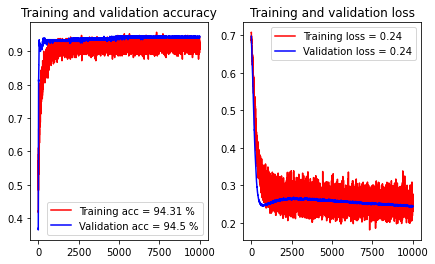

In [32]:
acc_DO=history_DO.history['accuracy']
val_acc_DO=history_DO.history['val_accuracy']
loss_DO=history_DO.history['loss']
val_loss_DO=history_DO.history['val_loss']
epochs_DO=range(len(acc_DO)) # Get number of epochs

acc_DO_txt = str(round(acc_DO[len(acc_DO)-1]*100,2))
val_acc_DO_txt = str(round(val_acc_DO[len(val_acc_DO)-1]*100,2))

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(epochs_DO, acc_DO,'r',epochs_DO,val_acc_DO,'b')
ax1.set_title('Training and validation accuracy')
ax1.legend(["Training acc = "+acc_DO_txt+" %","Validation acc = "+val_acc_DO_txt+" %"])

loss_DO_txt = str(round(loss_DO[len(loss_DO)-1],2))
val_loss_DO_txt = str(round(val_loss_DO[len(val_loss_DO)-1],2))

ax2.plot(epochs_DO, loss_DO, 'r',epochs_DO, val_loss_DO, 'b')
ax2.legend(["Training loss = "+loss_DO_txt,"Validation loss = "+val_loss_DO_txt])
ax2.set_title('Training and validation loss');

รูปที่ 3.9 ความแม่นยำและค่าสูญเสียจากโมเดลดรอปเอาต์

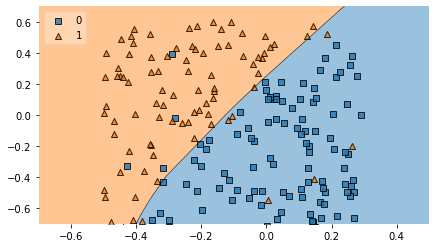

In [33]:
plot_decision_regions(test_X, np.squeeze(test_Y), clf=model_DO, legend=2)
plt.xlim([-0.7,0.5])
plt.ylim([-0.7,0.7])
plt.show()

รูปที่ 3.10 เส้นแบ่งเขตการจำแนกข้อมูลจากโมเดลดรอปเอาต์

#### 3.2.3 การแต่งเติมข้อมูล

### โจทย์ปัญหา

3-1 จากชุดข้อมูลที่มีให้ในไลบรารี sklearn ดังโจทย์ปัญหาข้อ 2-4 เขียนโค้ดไพธอนเพื่อสุ่มแยกข้อมูลเป็นชุดฝึกและชุดทดสอบตามอัตราส่วนที่กำหนด 
เช่น 80%, 20 % 




<p align="center">
<img src="https://drive.google.com/thumbnail?id=13bzT7Rmy3bzvE7TiS0yfQo94kpxMuipF" alt="dewninja"/>
</p>
<div align="center">dew.ninja 2022</div>